# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



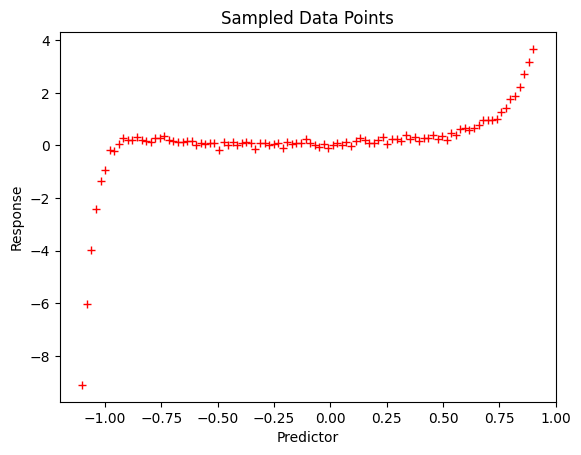

In [57]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor, response = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

Simple Regression
w and b Coefficients: [0.2580638  1.35906705]
Mean Squared Error of Linear Regression: 1.3429

Polynomial Regression
The best degree (k) that minimizes MSE is: 19
Mean Squared Error of Polynomial Regression: 0.0065


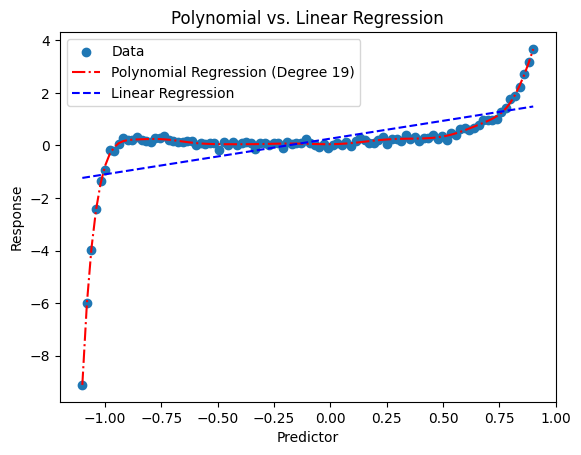

In [64]:

#Linear Regression Implementation
X_linear = np.vstack((np.ones_like(predictor), predictor)).T
coeff_linear = np.linalg.inv(X_linear.T.dot(X_linear)).dot(X_linear.T).dot(response)
y_pred_linear = X_linear.dot(coeff_linear)
mse_linear = np.mean((response - y_pred_linear) ** 2)

# Displaying the results for Linear Regression
print("Simple Regression")
print(f"w and b Coefficients: {coeff_linear}")
print(f"Mean Squared Error of Linear Regression: {mse_linear:.4f}\n")

# Polynomial Linear Regression Implementation

# Function to calculate MSE for polynomial regression of degree 'k'
def calculateMSE(k, x, y):
    X_poly = np.vstack([x ** d for d in range(k + 1)]).T
    coeff_poly = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    y_pred_poly = X_poly.dot(coeff_poly)
    mse_poly = np.mean((y - y_pred_poly) ** 2)
    return mse_poly

best_degree = None
min_mse = float('inf')

# Finding best degree and minimum MSE
for degree in range(1, 26):
    mse = calculateMSE(degree, predictor, response)
    if mse < min_mse:
        min_mse = mse
        best_degree = degree

# Using the best degree for polynomial regression
k = best_degree
X_poly = np.vstack([predictor ** d for d in range(k + 1)]).T
coeff_poly = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(response)
y_pred_poly = X_poly.dot(coeff_poly)
mse_poly = np.mean((response - y_pred_poly) ** 2)

# Displaing the results for Polynomial Regression
print("Polynomial Regression")
print(f"The best degree (k) that minimizes MSE is: {best_degree}")
print(f"Mean Squared Error of Polynomial Regression: {mse_poly:.4f}")


# Ploting the data and regression lines for comparison
plt.scatter(predictor, response, label="Data")
plt.plot(predictor, y_pred_poly, label=f"Polynomial Regression (Degree {k})", linestyle='-.', color='red')
plt.plot(predictor, y_pred_linear, label="Linear Regression", linestyle='--', color='blue')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title(f'Polynomial vs. Linear Regression')
plt.legend()
plt.show()


#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

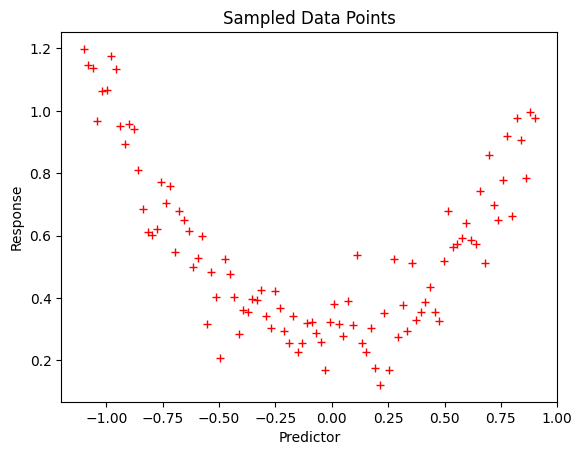

In [72]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

Mean Squared Error (Overfitting - Degree 25): 0.023276912816773198
Mean Squared Error (L1 Regularization - Lasso): 0.009323401491348722
Mean Squared Error (L2 Regularization - Ridge): 0.008014425756211741


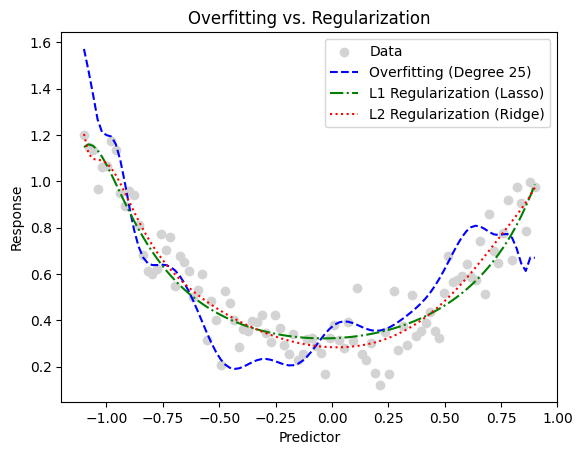

In [73]:
# Function for polynomial regression and regularization
def polynomialRegression(x, y, degree):
    X = np.vander(x, degree + 1, increasing=True)
    coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return coefficients

# Fitting a higher-degree polynomial (overfitting)
degree_high = 25  # Choosing a higher degree of my choice
X_poly_high = np.vstack([predictor_low ** d for d in range(degree_high + 1)]).T
coeff_high = polynomial_regression(predictor_low, response_low, degree_high)
y_pred_high = np.polyval(coeff_high[::-1], predictor_low)
mse_high = np.mean((response_low - y_pred_high) ** 2)

# Applying L1 (Lasso) regularization to reduce overfitting
alpha_lasso = 1.8
coeff_lasso = np.linalg.inv(X_poly_high.T.dot(X_poly_high) + alpha_lasso * np.identity(degree_high + 1)).dot(X_poly_high.T).dot(response_low)
y_pred_lasso = X_poly_high.dot(coeff_lasso)
mse_lasso = np.mean((response_low - y_pred_lasso) ** 2)

# Applying L2 (Ridge) regularization to reduce overfitting
alpha_ridge = 0.01 
coeff_ridge = np.linalg.inv(X_poly_high.T.dot(X_poly_high) + alpha_ridge * np.identity(degree_high + 1)).dot(X_poly_high.T).dot(response_low)
y_pred_ridge = X_poly_high.dot(coeff_ridge)
mse_ridge = np.mean((response_low - y_pred_ridge) ** 2)

# Displaying the results
print(f"Mean Squared Error (Overfitting - Degree {degree_high}): {mse_high}")
print(f"Mean Squared Error (L1 Regularization - Lasso): {mse_lasso}")
print(f"Mean Squared Error (L2 Regularization - Ridge): {mse_ridge}")

colors = {
    'data': 'lightgray',
    'overfitting': 'blue',
    'lasso': 'green',
    'ridge': 'red'
}

# Plotting the data and regression lines
plt.scatter(predictor_low, response_low, label="Data", color=colors['data'])
plt.plot(predictor_low, y_pred_high, label=f"Overfitting (Degree {degree_high})", linestyle='--', color=colors['overfitting'])
plt.plot(predictor_low, y_pred_lasso, label="L1 Regularization (Lasso)", linestyle='-.', color=colors['lasso'])
plt.plot(predictor_low, y_pred_ridge, label="L2 Regularization (Ridge)", linestyle=':', color=colors['ridge'])
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Overfitting vs. Regularization')
plt.legend()
plt.show()


Mean Squared Error (Overfitting - Degree 25): 0.023276912816773198
Mean Squared Error (L1 Regularization - Lasso): 0.010019104611114542
Mean Squared Error (L2 Regularization - Ridge): 0.008014479349685123


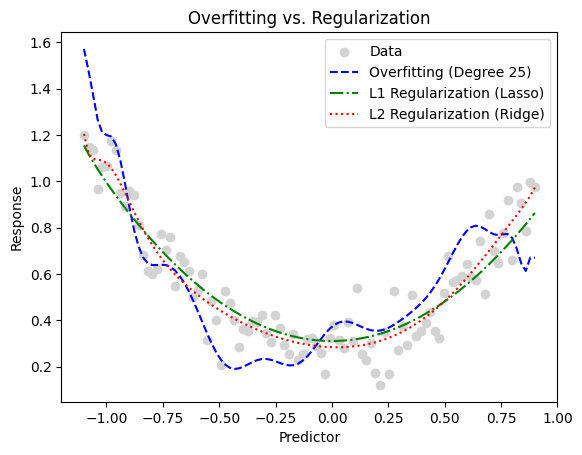

In [74]:


# Define functions for polynomial regression and regularization
def polynomial_regression(x, y, degree):
    X = np.vander(x, degree + 1, increasing=True)
    coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return coefficients

# Fit a higher-degree polynomial (overfitting)
degree_high = 25  # Choose a higher degree
coeff_high = polynomial_regression(predictor_low, response_low, degree_high)
y_pred_high = np.polyval(coeff_high[::-1], predictor_low)
mse_high = np.mean((response_low - y_pred_high) ** 2)

# Apply L1 (Lasso) regularization to reduce overfitting
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
X_poly_high = np.vstack([predictor_low ** d for d in range(degree_high + 1)]).T
lasso.fit(X_poly_high, response_low)
y_pred_lasso = lasso.predict(X_poly_high)
mse_lasso = np.mean((response_low - y_pred_lasso) ** 2)

# Apply L2 (Ridge) regularization to reduce overfitting
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(X_poly_high, response_low)
y_pred_ridge = ridge.predict(X_poly_high)
mse_ridge = np.mean((response_low - y_pred_ridge) ** 2)

# Display the results
print(f"Mean Squared Error (Overfitting - Degree {degree_high}): {mse_high}")
print(f"Mean Squared Error (L1 Regularization - Lasso): {mse_lasso}")
print(f"Mean Squared Error (L2 Regularization - Ridge): {mse_ridge}")

# Plot the data and regression lines
plt.scatter(predictor_low, response_low, label="Data", color='lightgray')
plt.plot(predictor_low, y_pred_high, label=f"Overfitting (Degree {degree_high})", linestyle='--', color='blue')
plt.plot(predictor_low, y_pred_lasso, label="L1 Regularization (Lasso)", linestyle='-.', color='green')
plt.plot(predictor_low, y_pred_ridge, label="L2 Regularization (Ridge)", linestyle=':', color='red')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Overfitting vs. Regularization')
plt.legend()
plt.show()


### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [14]:
credit = pd.read_csv('credit.csv')
credit.head()


,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


Multiple Linear Regression Coefficients:
b0: -477.95808839981567
b1: -7.558036611963628
b2: 0.125851154930578
b3: 2.063100710664518
b4: 11.591557994143486
b5: -0.8923977502583408
b6: 1.9982825460455824
Mean Squared Error: 25671.953118252048


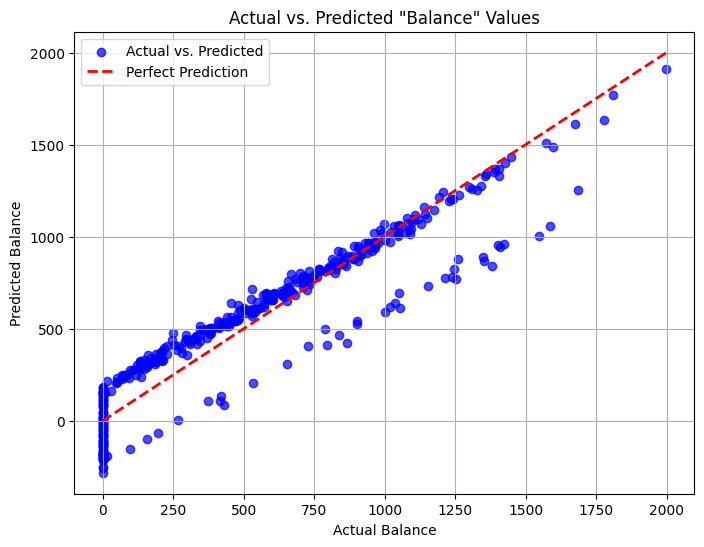

In [4]:
# Load the credit.csv file
credit = pd.read_csv('credit.csv')

# Extract predictor variables and response variable
X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']].values
y = credit['Balance'].values

# Add a constant column for the intercept term in the multiple linear regression
X = np.column_stack((np.ones(len(X)), X))

# Perform multiple linear regression
coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_pred = X.dot(coefficients)

# Calculate mean squared error
mse = np.mean((y - y_pred) ** 2)

# Display coefficients and mean squared error
print("Multiple Linear Regression Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"b{i}: {coef}")
print(f"Mean Squared Error: {mse}")

# # Plot actual vs. predicted values with different colors
# plt.scatter(y, y_pred, c=['blue' if actual > predicted else 'red' for actual, predicted in zip(y, y_pred)])
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs. Predicted Values in Multiple Linear Regression")
# plt.show()


# Plot actual vs. predicted 'Balance' values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7, color='b', label='Actual vs. Predicted')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted "Balance" Values')
plt.xlabel('Actual Balance')
plt.ylabel('Predicted Balance')
plt.legend()
plt.grid(True)
plt.show()



In [5]:
from scipy import stats

# Calculating residuals
residuals = y - X.dot(coefficients)

# Calculating residual standard deviation
residual_std = np.std(residuals)

# Calculating F-statistic and p-value for variable significance
n, p = X.shape
dof1 = len(coefficients) - 1
dof2 = n - p - 1
f_statistic = (np.sum((coefficients[1:] ** 2) / (residual_std ** 2))) / dof1
p_value = 1 - stats.f.cdf(f_statistic, dof1, dof2)

# Displaying F-statistic and p-value for variable significance
print("Variable Significance (F-statistic and p-value):")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Determining whether to reject the null hypothesis
alpha = 0.05  # Significance level
if p_value < alpha:
    print("At least one variable is significant.")
else:
    print("All variables are not needed.")


Variable Significance (F-statistic and p-value):
F-statistic: 0.001302003676733809
P-value: 0.9999999899451217
All variables are not needed.


In [6]:
# Creating an interaction term between Rating and Age
interaction_X = X.copy()
interaction_X[:, 5] = X[:, 3] * X[:, 5]  # Rating * Age interaction term

# Performing multiple linear regression with the interaction term
interaction_coefficients = np.linalg.inv(interaction_X.T.dot(interaction_X)).dot(interaction_X.T).dot(y)

# Calculating mean squared error for the interaction term
interaction_y_pred = interaction_X.dot(interaction_coefficients)
interaction_mse = np.mean((y - interaction_y_pred) ** 2)

# Displaying coefficients and mean squared error for the interaction term
print("Multiple Linear Regression Coefficients (with Interaction Term):")
for i, coef in enumerate(interaction_coefficients):
    print(f"b{i}: {coef}")
print(f"Mean Squared Error (with Interaction Term): {interaction_mse}")
print("The MSE values are very close to each other which suggests that the interaction effect between 'Rating' and 'Age' has a relatively small impact on the model's predictive performance")



Multiple Linear Regression Coefficients (with Interaction Term):
b0: -528.3126060761404
b1: -7.5288338676010635
b2: 0.1247839634022101
b3: 2.2173442035504904
b4: 11.121531315789419
b5: -0.002419162651879507
b6: 1.9623656565058263
Mean Squared Error (with Interaction Term): 25635.066248156098
The MSE values are very close to each other which suggests that the interaction effect between 'Rating' and 'Age' has a relatively small impact on the model's predictive performance


### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [ ]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


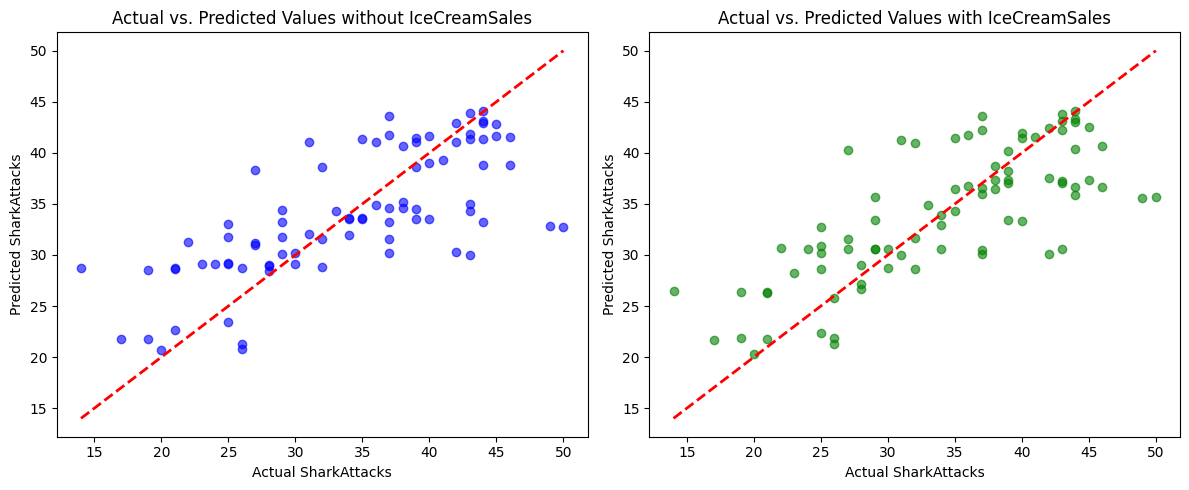

Mean Squared Error without IceCreamSales: 33.54214905935011
Mean Squared Error with IceCreamSales: 30.286659955139164
Predictions made with IceCreamSales data are better.


In [9]:
# Loading the shark_attacks.csv file
sharks = pd.read_csv('shark_attacks.csv')

# Extracting predictor variables (Year, Month, Temperature) and response variable (SharkAttacks)
X_without_ice_cream = sharks[['Year', 'Month', 'Temperature']].values
X_with_ice_cream = sharks[['Year', 'Month', 'Temperature', 'IceCreamSales']].values
y = sharks['SharkAttacks'].values

#Function to perform linear regression
def linear_regression(X, y):
    X = np.column_stack((np.ones(len(X)), X))  # Add a constant column for the intercept
    coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    y_pred = X.dot(coefficients)
    return coefficients, y_pred

# Performing linear regression without IceCreamSales
coefficients_without_ice_cream, y_pred_without_ice_cream = linear_regression(X_without_ice_cream, y)

# Performing linear regression with IceCreamSales
coefficients_with_ice_cream, y_pred_with_ice_cream = linear_regression(X_with_ice_cream, y)

# Calculating mean squared errors without and with IceCreamSales
mse_without_ice_cream = np.mean((y - y_pred_without_ice_cream) ** 2)
mse_with_ice_cream = np.mean((y - y_pred_with_ice_cream) ** 2)

plt.figure(figsize=(12, 5))

# Ploting actual vs. predicted values without IceCreamSales
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_without_ice_cream, color='blue', alpha=0.6)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual SharkAttacks")
plt.ylabel("Predicted SharkAttacks")
plt.title("Actual vs. Predicted Values without IceCreamSales")

# Ploting actual vs. predicted values with IceCreamSales
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred_with_ice_cream, color='green', alpha=0.6)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual SharkAttacks")
plt.ylabel("Predicted SharkAttacks")
plt.title("Actual vs. Predicted Values with IceCreamSales")

plt.tight_layout()
plt.show()

# Comparing mean squared errors
print(f"Mean Squared Error without IceCreamSales: {mse_without_ice_cream}")
print(f"Mean Squared Error with IceCreamSales: {mse_with_ice_cream}")

# Determining which model is better/worse
if mse_without_ice_cream < mse_with_ice_cream:
    print("Predictions made without IceCreamSales data are better.")
elif mse_without_ice_cream > mse_with_ice_cream:
    print("Predictions made with IceCreamSales data are better.")
else:
    print("Both models have similar performance.")
